In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
fs_923_df = pd.read_csv('../data/fs_sept_23.csv')
ce5_923_df = pd.read_csv('../data/ce5_sept_23.csv')
ce6_923_df = pd.read_csv('../data/ce6_sept_23.csv')
ce5_923_df['4'] = ce5_923_df['4'].str.extract(r'(\d)')
ce5_923_df['4'] = pd.to_numeric(ce5_923_df['4'], errors='coerce')
ce5_923_df['0'] = pd.to_datetime(ce5_923_df['0'], format='%Y-%m-%dT%H:%M:%S')
ce6_923_df['4'] = ce6_923_df['4'].str.extract(r'(\d)')
ce6_923_df['4'] = pd.to_numeric(ce6_923_df['4'], errors='coerce')
ce6_923_df['0'] = pd.to_datetime(ce6_923_df['0'], format='%Y-%m-%dT%H:%M:%S')

In [72]:
begin_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['BEGIN', 'USEDMEM', 'CPUS']].rename(columns={'BEGIN':'TIME'})
begin_load_df['USEDMEM'] = pd.to_numeric(begin_load_df['USEDMEM'].str[:-1], errors='coerce')
begin_load_df['CPUS'] = pd.to_numeric(begin_load_df['CPUS'], errors='coerce')

end_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['END', 'USEDMEM', 'CPUS']].rename(columns={'END':'TIME'})
# Since ending the process gives back the memory make all this values negative
end_load_df['USEDMEM'] = 0 - pd.to_numeric(end_load_df['USEDMEM'].str[:-1], errors='coerce')
end_load_df['CPUS'] = 0 - pd.to_numeric(end_load_df['CPUS'], errors='coerce')
load_df = begin_load_df.append(end_load_df).fillna(0)
load_df = load_df[load_df['TIME'].str.match(r'2021-09-23')].sort_values('TIME')
load_df['TIME'] = pd.to_datetime(load_df['TIME'], format='%Y-%m-%dT%H:%M:%S')

In [103]:
fs_ts = pd.Series(list(load_df['USEDMEM']), index=list(load_df['TIME']))

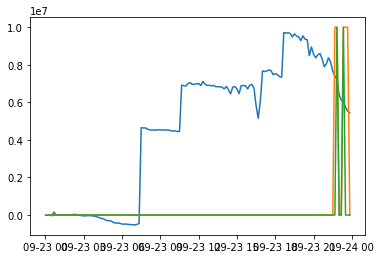

In [104]:
# not sure if the times are aligned here, if they are it might not be
# as clear a case of load issue as first appeared
# Will make another notebook to create a single dataframe so time alignment
#  can be verified
plt.plot(fs_ts.resample("10T").sum().to_frame().cumsum())
plt.plot(ce5_923_df.set_index('0').resample('10T').sum()*10000000)
plt.plot(ce6_923_df.set_index('0').resample('10T').sum()*10000000)